# Customer habits of Ford GoBike System in September 2019

__Varsha Shukla__<br/>
Oct -2019

## Investigation Overview

> In this investigation, I wanted to look at the customer behaviour characteristics of the bay Area bike share system. The main focus was on the time (month, weekday, hour), when bikes were high in demand.



## Dataset Overview

> This document explores the Ford GoBike's trip data for  bike rides from September FY2019. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. Some data points were removed from the analysis due to inconsistencies in the birth date, which in some cases was dated prior 1900.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('/Users/vashukla/Downloads/udacity/Project_4_communicate_data_findings /master_clean_file.csv')

In [13]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

## Individual trips by subscription type
> Ford GoBike System currently offers 3 subscribtion types: Single Ride, Access Pass (24h or 72h) and Monthly Membership. Customers with a monthly membership ("Subscriber") make 88% of all customers in FY 2018 that used the system. 12% were casual riders ("Customer") using the bike share system ocasionally.

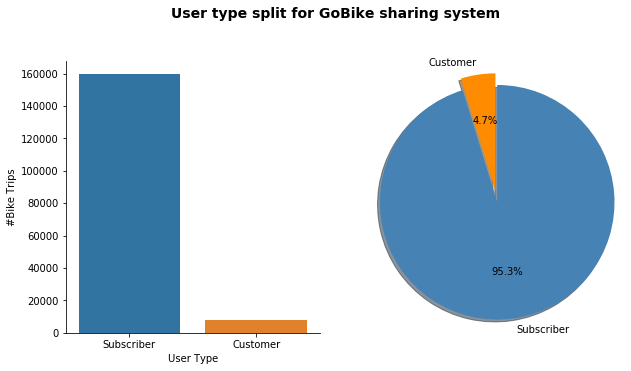

In [14]:
plt.figure(figsize = [10, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

## Daily and weekly habits by subscription type
> Based on the below heatmap, we can clearly indicate different renting habits for customers and subscribers and based on the renting purpose we can assign them to two different groups: leisure for customers and commute for subscribers. <br/>
__Customers use the bike sharing system more often on weekends:__<br/>
- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm. The system for this type is also more often used around the lunchtime than for subscribers.
- weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm<br/>
__Subscribers use the bike sharing system mainly on weekdays:__<br/>
- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
- weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout entire weekends


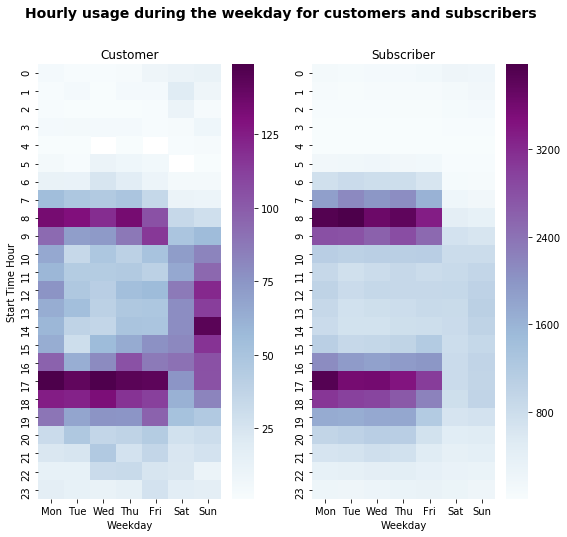

In [15]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');


## Lenght of trips by subscription type
> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

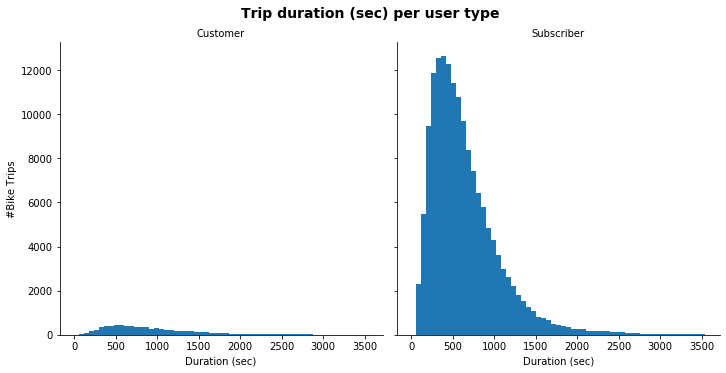

In [17]:
# code for the (histogram) duration (sec) distribution per user type

base_color = sb.color_palette()[0]

g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) per user type', y=1.03, fontsize=14, fontweight='semibold');

## Summary
> Renting a bike from Ford GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in urban areas, both for pleasure and work. There are two types of clients using the system: subscribers who are mainly daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around the lunch time, and customers, usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.